# Supervised Machine Learning with Python I


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

# Objectives

* Learn the basic principles of Machine Learning

* Get to know the `scikit-learn` library and how to use it for Machine Learning.

* Understand the close relationship between ML and optimization

* Learn how to do linear regression with `scikit-learn`

* Learn how to evaluate the results of training a regression algorithm


# Machine Learning


# `scikit-learn`

![scikit-learn cheat sheet](http://amueller.github.io/sklearn_tutorial/cheat_sheet.png)

## Linear Regression as a model for Machine Learning

Linear regression finds an $h_\theta$ of the form:

$$ h_\theta(X) = \theta \cdot X = \theta_0 + \theta_1 \cdot X_1 + ... + \beta_n \cdot X_n$$


Notice that X is **fixed**: we have one set of data. Finding $h_\theta(X)$ means finding the values of $\theta$ that make $h_\theta(X)$ most similar to y.




### Cost (loss) function

Difference between  $h_\theta(X)$  and y

$$L(\theta) = h_\theta(X) - y$$

We need to minimize it: we need its derivative _with respect to $\theta_i$_

## ML is optimization of a loss function.

In the case of Linear Regression, we are lucky because we can get an analytic expression of the derivative. That means we can "teleport" to its minimum.

In many other algorithms we can't, but we can calculate the derivative numerically at any point we want. How can we use that to find the minima?

### Gradient descent

![Gradient Descent](http://cdn-images-1.medium.com/max/800/1*NRCWfdXa7b-ak2nBtmwRvw.png)

from [primo.ai](http://primo.ai/)

# Machine Learning with Python: `scikit-learn`

## Generate dummy data

We are going to generate fake data before we dive into real data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
n_sample = 300
n_features = 1

X, y = datasets.make_regression(n_sample, n_features, noise=20)

X.shape

(300, 1)

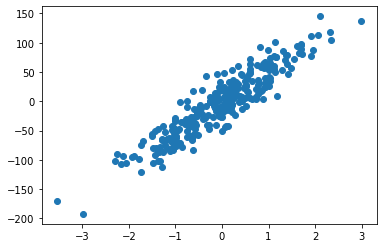

In [4]:
plt.scatter(X, y)

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [6]:
lr.fit(X, y)

LinearRegression()

In [7]:
lr.predict(X)

array([   3.71923894,    9.6482539 ,  -38.17929158,   83.86317534,
         25.22353827,  -92.02822617,  -53.99239867,   51.58776384,
        -58.78604738,  -54.31465819,   -1.99135086,   13.04571198,
        120.35156109,   51.96734438,   -3.88886514,   14.83682395,
        -42.13047962,  -31.62756986,  -40.53734131,  -24.18836386,
        -76.26689632,  -33.42003596,    9.68792957,   20.14065357,
        -27.36401542,   25.07802196,   56.80011009,  -67.76833536,
        -76.82888041,  100.38311827,   24.45242881,    9.82407999,
        -91.98798221,  -17.16146808,  -33.49030401,    0.67475267,
         87.83615116,   16.38809919,   -9.95684178,  -70.33192899,
        -47.84736167,   75.11737809,  -79.37412687,  153.86972163,
        -78.25386703,    9.12699626,  -57.11084587,    4.28648812,
         44.05586191,   -3.49889162,   13.11292636,   52.25927606,
        -53.18555387,    3.36597198,    0.6679359 ,  -80.24131115,
         41.648128  ,   69.44149666,    0.72613697,    6.04568

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X, y)

rf.predict(X)

array([-3.28824084e+00,  6.84536010e+00, -5.35791312e+01,  8.52391012e+01,
        1.92627137e+01, -9.11167710e+01, -4.74217080e+01,  5.89308550e+01,
       -6.58588545e+01, -5.97364746e+01, -4.01857141e+01,  2.42308503e+01,
        1.12875770e+02,  5.08253803e+01,  8.44456995e+00,  1.39297658e+01,
       -3.24764952e+01, -5.25685179e+01, -4.31474267e+01, -1.17098984e+01,
       -8.12801718e+01, -5.72126620e+01, -8.52421493e+00,  1.49212241e+00,
       -1.51695582e+01,  5.66196305e+00,  6.23292693e+01, -5.79348765e+01,
       -6.26183029e+01,  8.59345744e+01,  1.19012909e+01,  1.54907810e+01,
       -1.08673619e+02, -2.83714711e+01, -6.52030517e+01,  1.51952044e+01,
        8.39845027e+01,  3.25875609e+01, -7.64425006e-01, -9.27368727e+01,
       -3.30433361e+01,  5.74758452e+01, -6.01872735e+01,  1.29659003e+02,
       -9.18793060e+01,  2.62722800e+00, -7.00711847e+01,  4.05256285e+00,
        5.63799881e+01, -6.92694428e-01,  1.72331810e+01,  4.39682280e+01,
       -5.87026588e+01, -

This time, rather than code our own gradient descent optimizer, we will use `scikit-learn`

## The `Estimator` interface

In scikit-learn, preprocessing, supervised and unsupervised learning algorithms share a uniform interface.

Al estimators have a `.fit()` method, which takes:

- X, a numpy array or scipy sparse matrix

- y, in the case of supervised learning. It is a one-dimensional numpy array containing target values.

Once fitted, `Estimators` can either:

- `.predict()` a new set of y values from an `X_test` array: classification, regression, clustering

- `.transform()` an input `X_test` array: preprocessing, dimensionality reduction, feature extraction...

## Fitting a LinearRegression with `sklearn`

In [9]:
lr = LinearRegression()#instanciamos una regresion lineal
lr.predict(X)#esto asi dara error, porque esta regresion lineal no tiene unas variables tetas aun calculadas

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [10]:
lr.fit(X,y)#esta lr, se ha cambiado inplace, por lo tanto lo siguiente que voy ha hacer no dara error
lr.coef_, lr.intercept_#estos parametros representan la recta que mejor se ajusta

(array([51.98493356]), -1.6041670179210121)

## Ejercicio

Plot the observation (plt.scatter()) and the line that our LinearRegression has learned

Ejemplo:

xs = np.linspace(0,10)

ys = np.sin(xs)

plt.plot(xs,ys)

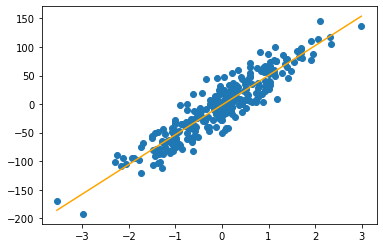

In [11]:
plt.scatter(X,y)

xs = np.linspace(min(X),max(X))
y_hat = lr.coef_ * xs + lr.intercept_

plt.plot(xs,y_hat,c='orange')

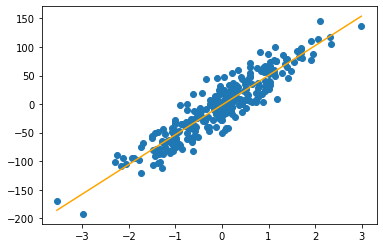

In [12]:
# si hacemos:
y_hat2 = lr.predict(xs)
#deberia salir lo mismo
plt.scatter(X,y)
plt.plot(xs,y_hat2,c='orange')

In [13]:
# MSE
y_hat = lr.predict(X)
(y - y_hat) ** 2
# y ahora sacamos la media
mse = np.mean((y - y_hat) ** 2)

# RMS
rmse = np.sqrt(mse)

mse, rmse

(416.80282337097714, 20.415749395282486)

In [14]:
# Error absoluto medio
np.mean(np.abs(y - y_hat))

#Esto significa que de media mi prediccion esta a 16.26 unidades del valor real

16.422841942708224

Is this a good estimate of the generalization error?

In [15]:
# Respuesta: NO

## Scoring and model validation

Our training set error will always be an optimistic estimate of our test set error.

We need to do a train, test split:

In [16]:
X.shape

(300, 1)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

X_train.shape
#se ha reservado parte de los datos para entrenamiento y otra parte para test, 
#por eso la shape ha camnbiado a menos

(225, 1)

In [18]:
lr = LinearRegression()

lr.fit(X_train,y_train)# hacemos el fit con el train
y_hat = lr.predict(X_test)#hacemos el predict con los datos de test, para ver si lo calculado se ajusta bien

np.mean(np.abs(y_test - y_hat))#aqui vemos la media del error absoluto

16.369202205690033

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size =.3)

lr = LinearRegression()

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)

np.mean(np.abs(y_test - y_hat))

17.007225571549668

## Metrics for regression

MSE: Mean Squared Error

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - h(x_i))^2$$

MAE: Mean Absolute Error 

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - h(x_i)|$$

MAPE: Mean Absolute Percent Error

$$MAE = \frac{1}{n} \sum_{i=1}^{n} \frac{|y_i - h(x_i)|}{y_i}$$

Explained Variance:


$$explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$$



We will learn more about scoring and model selection in a later module

# Regression algorithms in sklearn

We have already met Linear regression, which is a parametric algorithm. There are, however, _non-parametric_ algorithms that do not make assumption regarding the shape of the function to be approximated.

Let's try more sophisticated algorithms on our toy data and on real data.

In [20]:
from sklearn.datasets import fetch_openml, load_diabetes

diabetes = load_diabetes(as_frame=True)
diabetes_X = diabetes['data']
diabetes_y = diabetes['target']

diabetes_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [21]:
diabetes_y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [22]:
diabetes_y.shape

(442,)

#### Ejercicio

Train a linear regression on the diabetes dataset. Calculate the test set MSE, RMSE and MAE.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X,diabetes_y)

lr = LinearRegression()

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)

# MSE
mse = np.mean((y_test - y_hat) ** 2)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = np.mean(np.abs(y_test - y_hat))

mse, rmse, mae

(3029.5824515729473, 55.041642885845505, 44.626575833354835)

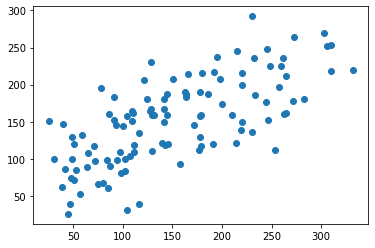

In [24]:
# si queremos ver como de buenas son mis predicciones podemos hacer:
plt.scatter(y_test, y_hat)
#por el resultado vemos que pueden estar correlacionadas, porque "forman" una diagonal, 
#que es lo que pasaria cuando el valor real y el predicho son similares

<AxesSubplot:>

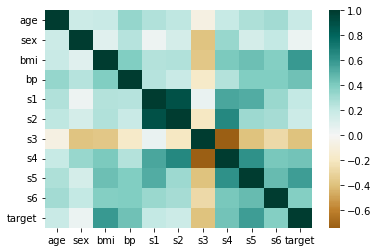

In [25]:
import seaborn as sns

with_target = diabetes_X.copy()
with_target['target'] = diabetes_y

sns.heatmap(with_target.corr(), cmap='BrBG', center=0)

In [26]:
#Solucion by Dani
pd.DataFrame(columns=['MSE','RMSE', "MAE"])

X_train, X_test, y_train, y_test = train_test_split(diabetes_X,diabetes_y)

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)

errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)


results_diabetes = pd.DataFrame(columns=['MSE','RMSE', "MAE"])
results_diabetes.loc['linear_regression'] = [mse,rmse,mae]
results_diabetes

,MSE,RMSE,MAE
linear_regression,3185.811026,56.442989,46.990529


In [27]:
housing = fetch_openml(name="house_prices", as_frame=True)
housing_X = housing['data']
housing_y = housing['target']


housing_X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal
1456,1457.0,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,MnPrv,None,0.0,2.0,2010.0,WD,Normal
1457,1458.0,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal
1458,1459.0,20.0,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,4.0,2010.0,WD,Normal


In [28]:
# vamos a quedarnos solo con variables numericas
data = housing_X.select_dtypes('number')
#tenemos muchos floats porque -> type(np.nan) es float, por lo tanto nos tiene que hacer pensar en datos missing

data = data.fillna(data.median())
data = data.drop('Id',axis=1)

In [29]:
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1457,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,...,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0


In [30]:
pd.DataFrame(columns=['MSE','RMSE', "MAE"])

X_train, X_test, y_train, y_test = train_test_split(data,housing_y)

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)

errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)


results_housing = pd.DataFrame(columns=['MSE','RMSE', "MAE"])
results_housing.loc['linear_regression'] = [mse,rmse,mae]
results_housing

,MSE,RMSE,MAE
linear_regression,1.430056e+09,37816.081211,23581.293264


## K nearest neighbors

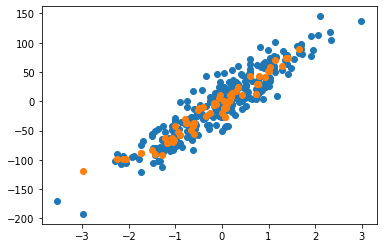

In [31]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=4)

X_train, X_test, y_train, y_test = train_test_split(X, y)

knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)

plt.scatter(X,y)
plt.scatter(X_test, y_hat)

Now with real data: 

```python
diabetes = datasets.load_diabetes()
```

In [32]:
#select a model and hyperparameters
knn = KNeighborsRegressor(n_neighbors=5)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(diabetes_X,diabetes_y)

#learn on the training set
knn.fit(X_train,y_train)
#Precict on the test set
y_hat = knn.predict(X_test)

#Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)


results_diabetes.loc['knn_5'] = [mse,rmse,mae]

In [33]:
#select a model and hyperparameters
knn = KNeighborsRegressor(n_neighbors=20)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(diabetes_X,diabetes_y)

#learn on the training set
knn.fit(X_train,y_train)
#Precict on the test set
y_hat = knn.predict(X_test)

#Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)


results_diabetes.loc['knn_20'] = [mse,rmse,mae]

In [34]:
#select a model and hyperparameters
knn = KNeighborsRegressor(n_neighbors=50)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(diabetes_X,diabetes_y)

#learn on the training set
knn.fit(X_train,y_train)
#Precict on the test set
y_hat = knn.predict(X_test)

#Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)


results_diabetes.loc['knn_50'] = [mse,rmse,mae]

In [35]:
results_diabetes

,MSE,RMSE,MAE
linear_regression,3185.811026,56.442989,46.990529
knn_5,3917.655135,62.591175,49.046847
knn_20,3518.434032,59.316389,48.873423
knn_50,3234.547503,56.873082,46.262703


```python
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
```

### Ejercicio

Train several k neighbors classifiers (with 5, 20, and 50 neighbors) on the housing dataset.
Measure their errors and annotarte them into the results DataFrame.

In [36]:
# vamos a quedarnos solo con variables numericas
data = housing_X.select_dtypes('number')
#tenemos muchos floats porque -> type(np.nan) es float, por lo tanto nos tiene que hacer pensar en datos missing
data = data.fillna(data.median())
data = data.drop('Id',axis=1)

#select a model and hyperparameters
knn = KNeighborsRegressor(n_neighbors=5)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(data,housing_y)

#learn on the training set
knn.fit(X_train,y_train)
#Precict on the test set
y_hat = knn.predict(X_test)

#Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)

results_housing = pd.DataFrame(columns=['MSE','RMSE', "MAE"])
results_housing.loc['knn_5'] = [mse,rmse,mae]

In [37]:
#select a model and hyperparameters
knn = KNeighborsRegressor(n_neighbors=20)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(data,housing_y)

#learn on the training set
knn.fit(X_train,y_train)
#Precict on the test set
y_hat = knn.predict(X_test)

#Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)


results_housing.loc['knn_20'] = [mse,rmse,mae]

In [38]:
#select a model and hyperparameters
knn = KNeighborsRegressor(n_neighbors=50)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(data,housing_y)

#learn on the training set
knn.fit(X_train,y_train)
#Precict on the test set
y_hat = knn.predict(X_test)

#Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)


results_housing.loc['knn_50'] = [mse,rmse,mae]

In [39]:
results_housing

,MSE,RMSE,MAE
knn_5,1.794143e+09,42357.326398,27301.013699
knn_20,2.541045e+09,50408.780019,30834.185890
knn_50,3.583973e+09,59866.292933,37070.150411


In [40]:
normalized = data.copy()
normalized = (normalized - normalized.mean()) / normalized.std()
normalized

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073350,-0.220799,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.513928,0.575228,-0.288554,...,0.350880,-0.751918,0.216429,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,0.138730
1,-0.872264,0.460162,-0.091855,-0.071812,2.178881,0.156680,-0.429430,-0.570555,1.171591,-0.288554,...,-0.060710,1.625638,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.488943,-0.614228
2,0.073350,-0.084607,0.073455,0.651256,-0.517023,0.984415,0.829930,0.325803,0.092875,-0.288554,...,0.631510,-0.751918,-0.070337,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.990552,0.138730
3,0.309753,-0.447787,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.570555,-0.499103,-0.288554,...,0.790533,-0.751918,-0.175988,4.091122,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,-1.367186
4,0.073350,0.641752,0.375020,1.374324,-0.517023,0.951306,0.733056,1.366021,0.463410,-0.288554,...,1.697903,0.779930,0.563567,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,2.100173,0.138730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073350,-0.356992,-0.260471,-0.071812,-0.517023,0.918196,0.733056,-0.570555,-0.972685,-0.288554,...,-0.060710,-0.751918,-0.100523,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.620678,-0.614228
1456,-0.872264,0.687149,0.266316,-0.071812,0.381612,0.222899,0.151813,0.087881,0.759399,0.721865,...,0.126376,2.032535,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,1.644646
1457,0.309753,-0.175402,-0.147760,0.651256,3.077516,-1.002149,1.023678,-0.570555,-0.369744,-0.288554,...,-1.033560,-0.751918,0.201336,-0.359202,-0.116299,-0.270116,-0.068668,4.951415,-0.488943,1.644646
1458,-0.872264,-0.084607,-0.080133,-0.794879,0.381612,-0.704164,0.539309,-0.570555,-0.865252,6.090101,...,-1.089686,2.168167,-0.704242,1.473284,-0.116299,-0.270116,-0.068668,-0.087658,-0.858816,1.644646


In [41]:
#select a model and hyperparameters
knn = KNeighborsRegressor(n_neighbors=20)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(normalized,housing_y)

#learn on the training set
knn.fit(X_train,y_train)
#Precict on the test set
y_hat = knn.predict(X_test)

#Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)


results_housing.loc['knn_20_normalized'] = [mse,rmse,mae]
results_housing

,MSE,RMSE,MAE
knn_5,1.794143e+09,42357.326398,27301.013699
knn_20,2.541045e+09,50408.780019,30834.185890
knn_50,3.583973e+09,59866.292933,37070.150411
knn_20_normalized,1.490722e+09,38609.863604,22513.759863


## Decision Tree Regression


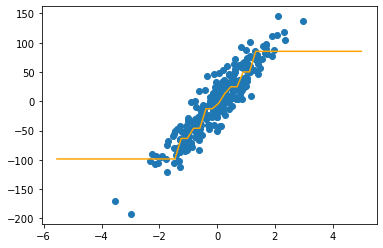

In [42]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10,
                           min_samples_leaf=20)# cuanta menos profundidad mayor varianza, basta comparar con 20 y con 5 para ver la diferencia

X_train, X_test, y_train, y_test = train_test_split(X, y)

dt.fit(X_train, y_train)

plt.scatter(X, y)
xs = np.linspace(min(X)-2, max(X)+2)
plt.plot(xs, dt.predict(xs), c='orange')

In [43]:
dt = DecisionTreeRegressor(max_depth=8)

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y)

dt.fit(X_train, y_train)
y_hat = dt.predict(X_test)

errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)


results_diabetes.loc['dt_8'] = [mse,rmse,mae]
results_diabetes

,MSE,RMSE,MAE
linear_regression,3185.811026,56.442989,46.990529
knn_5,3917.655135,62.591175,49.046847
knn_20,3518.434032,59.316389,48.873423
knn_50,3234.547503,56.873082,46.262703
dt_8,5828.130313,76.342192,61.982389


In [44]:
dt = DecisionTreeRegressor(max_depth=4)

X_train, X_test, y_train, y_test = train_test_split(normalized, housing_y)

dt.fit(X_train, y_train)
y_hat = dt.predict(X_test)

errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)


results_housing.loc['dt_4_normalized'] = [mse,rmse,mae]
results_housing

,MSE,RMSE,MAE
knn_5,1.794143e+09,42357.326398,27301.013699
knn_20,2.541045e+09,50408.780019,30834.185890
knn_50,3.583973e+09,59866.292933,37070.150411
knn_20_normalized,1.490722e+09,38609.863604,22513.759863
dt_4_normalized,1.535495e+09,39185.395419,27786.592662


In [45]:
dt = DecisionTreeRegressor(max_depth=4)

X_train, X_test, y_train, y_test = train_test_split(data, housing_y)

dt.fit(X_train, y_train)
y_hat = dt.predict(X_test)

errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)


results_housing.loc['dt_4'] = [mse,rmse,mae]
results_housing

,MSE,RMSE,MAE
knn_5,1.794143e+09,42357.326398,27301.013699
knn_20,2.541045e+09,50408.780019,30834.185890
knn_50,3.583973e+09,59866.292933,37070.150411
knn_20_normalized,1.490722e+09,38609.863604,22513.759863
dt_4_normalized,1.535495e+09,39185.395419,27786.592662
dt_4,1.731280e+09,41608.648660,27647.868342


# Generalizability of our models

We want to train models on known data in order to make inferences (predictions) on unknown data.

How do we know how good our models are? 

## Overfitting

![Under- and overfitting](https://djsaunde.files.wordpress.com/2017/07/bias-variance-tradeoff.png)

from https://djsaunde.wordpress.com/2017/07/17/the-bias-variance-tradeoff/

# Additional References


[An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)

[scikit-learn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)

[Regression metrics in sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)